In [2]:
# Imports for non-released version
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('./gbapy/')

# Load the GBA_model class
from GbaModel import *

In [3]:
# Load model directly from csv folder
model = read_csv_model("./examples/toy_models/D")

In [4]:
# Clean up previous trajectory data
model.clear_MC_trajectory()

# Read first f0 from csv
model.read_LP_from_csv()

In [5]:
# Check if cleared
model.MC_tracker

""


### MC population size comparison N_e = 100 to N_e = 1000

> Condition 1: MAXITER reached
> MC simulation: maximum iterations reached (condition=1,	mu=2.2467,	nb iterations=10000,	nb fixed=9648).
> Condition 1: MAXITER reached
> MC simulation: maximum iterations reached (condition=1,	mu=2.25483,	nb iterations=10000,	nb fixed=8591).


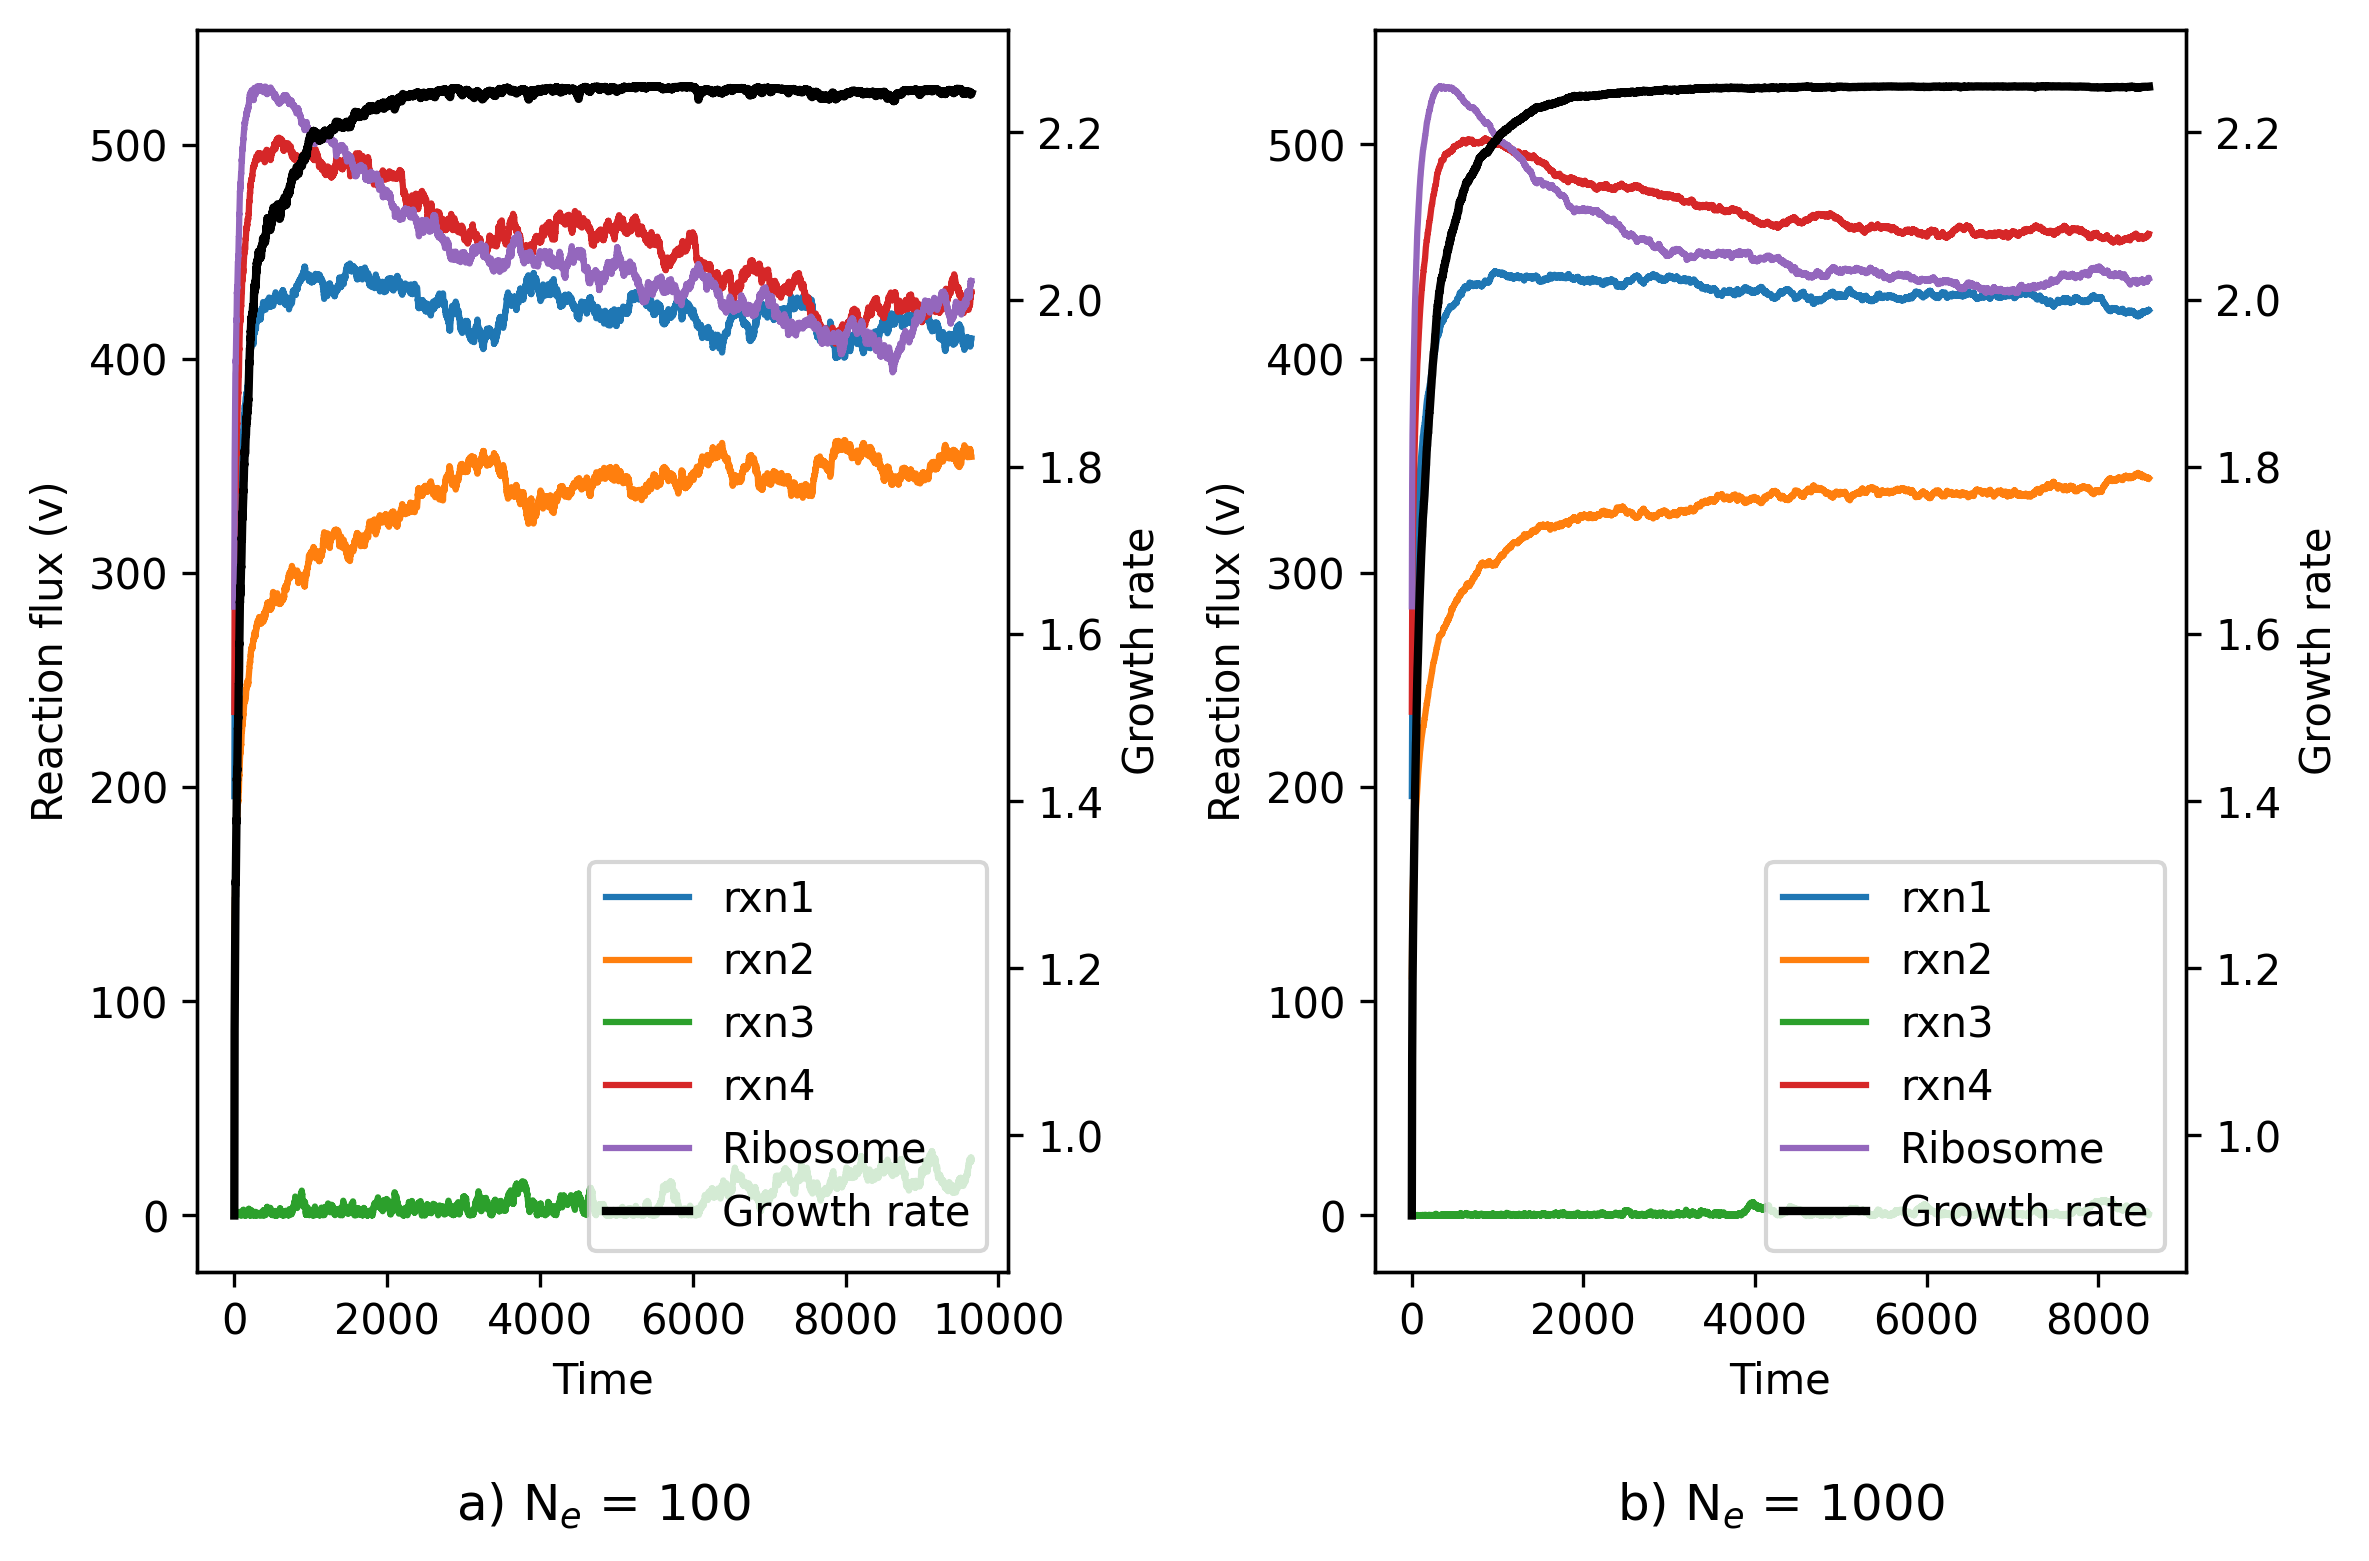

In [8]:
# First simulation: N_e = 100
model.clear_MC_trajectory()
model.set_f0(model.LP_solution)
model.MC_simulation(condition="1", max_iter=10000, sigma=0.0001, N_e=100, track=True, saved_values=['v'], label=1)

# Extract data for N_e = 100
DfluxCon1_Ne100 = model.MC_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time_Ne100 = model.MC_tracker["t"]
growthrate_Ne100 = model.MC_tracker["mu"]

# Second simulation: N_e = 1000
model.clear_MC_trajectory()
model.set_f0(model.LP_solution)
model.MC_simulation(condition="1", max_iter=10000, sigma=0.0001, N_e=1000, track=True, saved_values=['v'], label=1)

# Extract data for N_e = 1000
DfluxCon1_Ne1000 = model.MC_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time_Ne1000 = model.MC_tracker["t"]
growthrate_Ne1000 = model.MC_tracker["mu"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), dpi=300)

# First subplot (N_e = 100)
for column in DfluxCon1_Ne100:
    label = column.replace('.v', '')  
    ax1.plot(time_Ne100, DfluxCon1_Ne100[column], label=label)

ax1.set_xlabel('Time')
ax1.set_ylabel('Reaction flux (v)')

ax3 = ax1.twinx()
ax3.plot(time_Ne100, growthrate_Ne100, label='Growth rate', color='black', linewidth=2)
ax3.set_ylabel('Growth rate', color='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

ax1.text(0.5, -0.2, 'a) N$_e$ = 100', transform=ax1.transAxes, fontsize=12, ha='center')

# Second subplot (N_e = 1000)
for column in DfluxCon1_Ne1000:
    label = column.replace('.v', '')  
    ax2.plot(time_Ne1000, DfluxCon1_Ne1000[column], label=label)

ax2.set_xlabel('Time')
ax2.set_ylabel('Reaction flux (v)')

ax4 = ax2.twinx()
ax4.plot(time_Ne1000, growthrate_Ne1000, label='Growth rate', color='black', linewidth=2)
ax4.set_ylabel('Growth rate', color='black')

lines_3, labels_3 = ax2.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()

ax2.legend(lines_3 + lines_4, labels_3 + labels_4, loc='lower right')
ax2.text(0.5, -0.2, 'b) N$_e$ = 1000', transform=ax2.transAxes, fontsize=12, ha='center')


plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("MCMC_Pop_reaction_flux_growthrate_comparison.png", dpi=300)
plt.show()